### **Importing Libraries**


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### **Loading DataSet**

In [4]:
data_url = "./Dataset/Cit-HepPh.txt"
df_data_1 = pd.read_csv(data_url, sep='\t', skiprows=4, names=['FromNodeId', 'ToNodeId'], dtype={'FromNodeId': int, 'ToNodeId': int})

### **Loading Time of Release**

In [7]:
data_url = "./Dataset/cit-HepPh-dates.txt"
df_data_2 = pd.read_csv(data_url, sep='\t', skiprows=1, names=['NodeId', 'Date'], dtype={'NodeId': str, 'Date': str})
df_data_2['Date'] = pd.to_datetime(df_data_2['Date'])
graphs_by_date = {}
# Filter entries with leading 0's of the 'NodeId' column
df_data_2['NodeId'] = df_data_2['NodeId'].astype(str).str.lstrip('0')
# Filter entries with '11' at the beginning of the 'NodeId' column
df_data_2 = df_data_2[~df_data_2['NodeId'].str.startswith('11')]
df_data_2['NodeId'] = df_data_2['NodeId'].astype(int)
# i = 0
# unnodes = df_data_2['NodeId']
# for nodes in unnodes:
#     i += 1
# print(i)


30121


### **Merging Both DataSet**

In [26]:
df_merged = pd.merge(df_data_1, df_data_2, how='inner', left_on='FromNodeId', right_on='NodeId')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
# Filter out rows where 'ToNodeId' is not present in 'NodeId' column of df_data_2
df_merged = df_merged[df_merged['ToNodeId'].isin(df_data_2['NodeId'])]
# unnodes = df_merged['FromNodeId'].unique()
# i = 0
# for nodes in unnodes:
#     i += 1
# print(i)

26521


### **Creation of Graph**

In [30]:

# Construct the directed graph
G_lat = nx.from_pandas_edgelist(df_merged, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

print("Number of nodes:", len(G_lat.nodes()))
print("Number of edges:", len(G_lat.edges()))



Number of nodes: 28787
Number of edges: 316829
Density of the graph: 0.00038233776555389345


### **Density Yearly Analysis**

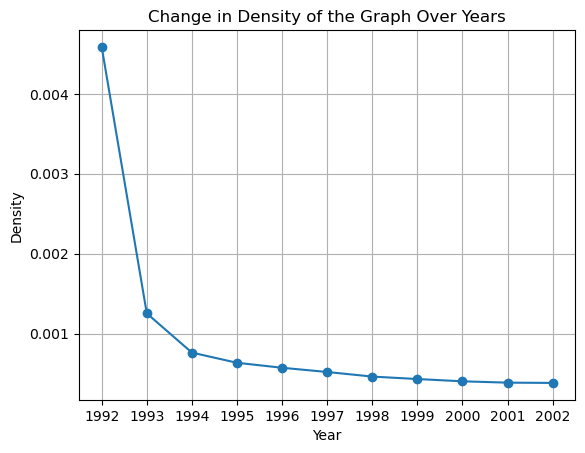

In [34]:
df_merged['Year'] = df_merged['Date'].dt.year
density_by_year = {}
grouped = df_merged.groupby('Year')

for year, group in grouped:
    filtered_data = df_merged[df_merged['Year'] <= year]
    G = nx.from_pandas_edgelist(filtered_data, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())
    density = nx.density(G)
    # print(density)

    density_by_year[year] = density

years = list(density_by_year.keys())
densities = list(density_by_year.values())

plt.plot(years, densities, marker='o')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Change in Density of the Graph Over Years')
plt.xticks(years)
plt.grid(True)
plt.show()